In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data=pd.get_dummies(data,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
df=data.pop('HeartDisease')
data.insert(len(list(data)),'HeartDisease',df)
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
914,68,144,193,1,141,3.4,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
915,57,130,131,0,115,1.2,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
916,57,130,236,0,174,0.0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


In [4]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Prediction using Stochastic Gradient Descent Classifier with loss= 'log'

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [7]:
clf=SGDClassifier(loss='log_loss',penalty='l2')
clf.fit(x_train,y_train)

SGDClassifier(loss='log_loss')

In [8]:
y_pred=clf.predict(x_test)

In [9]:
acc=accuracy_score(y_pred,y_test)
print('Accuracy Score = %0.2F'%(acc*100))
prec=precision_score(y_pred,y_test)
print('Precision Score = %0.2F'%(prec*100))
recall=recall_score(y_pred,y_test)
print('Recall Score = %0.2F'%(recall*100))
f1=f1_score(y_pred,y_test)
print('F1 Score = %0.2F'%(f1*100))

Accuracy Score = 80.98
Precision Score = 84.11
Recall Score = 83.33
F1 Score = 83.72


C:\Users\Dipak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dipak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dipak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dipak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

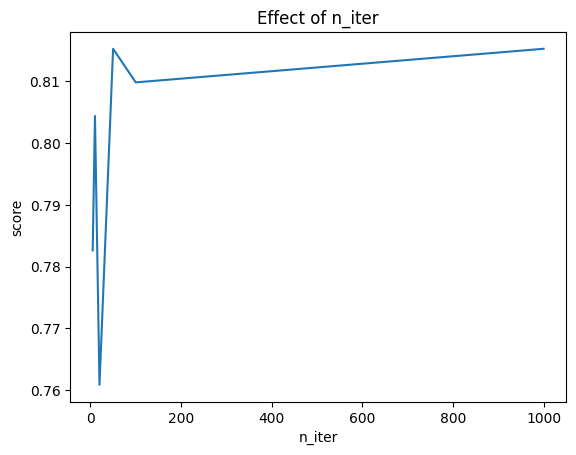

In [10]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss = "log_loss", penalty='l2', max_iter=n_iter)
    clf.fit(x_train, y_train)
    scores.append(clf.score(x_test, y_test))
    
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)

In [11]:
#Prediction
out=[0]*20

out[0]=int(input("Enter Age of Patient: "))
sex=input("Enter Sex of Patient: ")
if(sex=='F'):
    out[6]=1
    out[7]=0
else:
    out[6]=0
    out[7]=1

cpt=input("Enter Chest Pain Type of Patient: ")
if(cpt=='ASY'):
    out[8]=1
    out[9]=0
    out[10]=0
    out[11]=0
elif(cpt=='ATA'):
    out[8]=0
    out[9]=1
    out[10]=0
    out[11]=0
elif(cpt=='NAP'):
    out[8]=0
    out[9]=0
    out[10]=1
    out[11]=0
elif(cpt=='TA'):
    out[8]=0
    out[9]=0
    out[10]=0
    out[11]=1

out[1]=int(input("Enter Blood Pressure(Resting) of Patient: "))
out[2]=int(input("Enter Cholesterol of Patient: "))
out[3]=int(input("Is Blood Sugar(Fasting) >120 mg/dl? "))
ecg=input("Enter ECG(Resting) of Patient: ")
if(ecg=='LVH'):
    out[12]=1
    out[13]=0
    out[14]=0
elif(ecg=='Normal'):
    out[12]=0
    out[13]=1
    out[14]=0
elif(ecg=='ST'):
    out[12]=0
    out[13]=0
    out[14]=1

out[4]=int(input("Enter Max Heart Rate of Patient: "))
ea=input("Exercise Angina? ")
if(ea=="N"):
    out[15]=1
    out[16]=0
else:
    out[15]=0
    out[16]=1

out[5]=float(input("Enter Old Peak of Patient: "))
sts=input("Enter Slope of the peak: ")
if(sts=='Down'):
    out[17]=1
    out[18]=0
    out[19]=0
elif(sts=='Flat'):
    out[17]=0
    out[18]=1
    out[19]=0
elif(sts=='Up'):
    out[17]=0
    out[18]=0
    out[19]=1

Enter Age of Patient: 55
Enter Sex of Patient: F
Enter Chest Pain Type of Patient: ATA
Enter Blood Pressure(Resting) of Patient: 140
Enter Cholesterol of Patient: 302
Is Blood Sugar(Fasting) >120 mg/dl? 0
Enter ECG(Resting) of Patient: LVH
Enter Max Heart Rate of Patient: 150
Exercise Angina? N
Enter Old Peak of Patient: 4.3
Enter Slope of the peak: Flat


In [12]:
out=np.array(out)
out=out.reshape(1,-1)
o=clf.predict(out)
if(o==1):
    print("Patient have Heart Disease.")
else:
    print("Patient Doesn't have Heart Disease.")

Patient Doesn't have Heart Disease.


# Prediction using Stochastic Gradient Descent Classifier with loss= 'hinge'

In [13]:
clf=SGDClassifier(loss='hinge',penalty='l2')
clf.fit(x_train,y_train)

SGDClassifier()

In [14]:
y_pred=clf.predict(x_test)

In [15]:
acc=accuracy_score(y_pred,y_test)
print('Accuracy Score = %0.2F'%(acc*100))
prec=precision_score(y_pred,y_test)
print('Precision Score = %0.2F'%(prec*100))
recall=recall_score(y_pred,y_test)
print('Recall Score = %0.2F'%(recall*100))
f1=f1_score(y_pred,y_test)
print('F1 Score = %0.2F'%(f1*100))

Accuracy Score = 80.43
Precision Score = 81.31
Recall Score = 84.47
F1 Score = 82.86


C:\Users\Dipak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dipak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dipak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dipak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

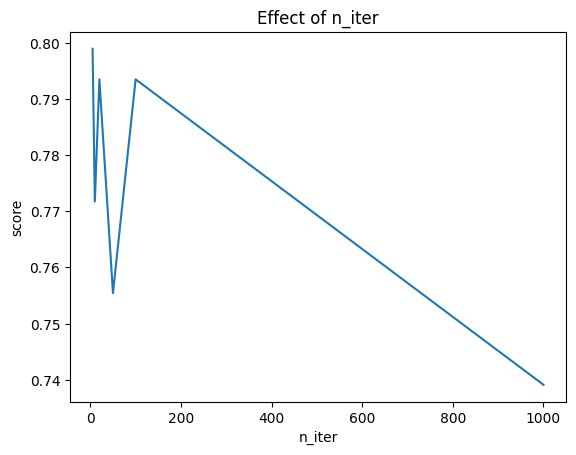

In [16]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss = "hinge", penalty='l2', max_iter=n_iter)
    clf.fit(x_train, y_train)
    scores.append(clf.score(x_test, y_test))
    
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)

In [17]:
#Prediction
out=[0]*20

out[0]=int(input("Enter Age of Patient: "))
sex=input("Enter Sex of Patient: ")
if(sex=='F'):
    out[6]=1
    out[7]=0
else:
    out[6]=0
    out[7]=1

cpt=input("Enter Chest Pain Type of Patient: ")
if(cpt=='ASY'):
    out[8]=1
    out[9]=0
    out[10]=0
    out[11]=0
elif(cpt=='ATA'):
    out[8]=0
    out[9]=1
    out[10]=0
    out[11]=0
elif(cpt=='NAP'):
    out[8]=0
    out[9]=0
    out[10]=1
    out[11]=0
elif(cpt=='TA'):
    out[8]=0
    out[9]=0
    out[10]=0
    out[11]=1

out[1]=int(input("Enter Blood Pressure(Resting) of Patient: "))
out[2]=int(input("Enter Cholesterol of Patient: "))
out[3]=int(input("Is Blood Sugar(Fasting) >120 mg/dl? "))
ecg=input("Enter ECG(Resting) of Patient: ")
if(ecg=='LVH'):
    out[12]=1
    out[13]=0
    out[14]=0
elif(ecg=='Normal'):
    out[12]=0
    out[13]=1
    out[14]=0
elif(ecg=='ST'):
    out[12]=0
    out[13]=0
    out[14]=1

out[4]=int(input("Enter Max Heart Rate of Patient: "))
ea=input("Exercise Angina? ")
if(ea=="N"):
    out[15]=1
    out[16]=0
else:
    out[15]=0
    out[16]=1

out[5]=float(input("Enter Old Peak of Patient: "))
sts=input("Enter Slope of the peak: ")
if(sts=='Down'):
    out[17]=1
    out[18]=0
    out[19]=0
elif(sts=='Flat'):
    out[17]=0
    out[18]=1
    out[19]=0
elif(sts=='Up'):
    out[17]=0
    out[18]=0
    out[19]=1

Enter Age of Patient: 55
Enter Sex of Patient: F
Enter Chest Pain Type of Patient: ATA
Enter Blood Pressure(Resting) of Patient: 140
Enter Cholesterol of Patient: 302
Is Blood Sugar(Fasting) >120 mg/dl? 0
Enter ECG(Resting) of Patient: LVH
Enter Max Heart Rate of Patient: 150
Exercise Angina? N
Enter Old Peak of Patient: 4.3
Enter Slope of the peak: Flat


In [18]:
out=np.array(out)
out=out.reshape(1,-1)
o=clf.predict(out)
if(o==1):
    print("Patient have Heart Disease.")
else:
    print("Patient Doesn't have Heart Disease.")

Patient Doesn't have Heart Disease.
